In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import scipy.stats as stats

In [2]:
## Import Ergast API csv's

circuits = pd.read_csv("Datasets/circuits.csv")
constructor_results = pd.read_csv("Datasets/constructor_results.csv")
constructor_standings = pd.read_csv("Datasets/constructor_standings.csv")
constructors = pd.read_csv("Datasets/constructors.csv")
driver_standings = pd.read_csv("Datasets/driver_standings.csv")
drivers = pd.read_csv("Datasets/drivers.csv")
lap_times = pd.read_csv("Datasets/lap_times.csv")
pit_stops = pd.read_csv("Datasets/pit_stops.csv")
qualifying = pd.read_csv("Datasets/qualifying.csv")
races = pd.read_csv("Datasets/races.csv")
results = pd.read_csv("Datasets/results.csv")
seasons = pd.read_csv("Datasets/seasons.csv")
sprint_results = pd.read_csv("Datasets/sprint_results.csv")
status = pd.read_csv("Datasets/status.csv")
weather = pd.read_csv("Datasets/weather.csv")

In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
## Joining datasets
driver_results = pd.merge(results,drivers, how='left',on='driverId')
driver_results_races = pd.merge(driver_results,races, how='left', on='raceId')
driver_results_races_circuits = pd.merge(driver_results_races,circuits, how='left', on='circuitId')
driver_results_races_circuits_status = pd.merge(driver_results_races_circuits,status, how='left', on='statusId')
merged_F1 = pd.merge(driver_results_races_circuits_status,constructors, how='left', on='constructorId')

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_16244\2848540835.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_F1 = pd.merge(driver_results_races_circuits_status,constructors, how='left', on='constructorId')


In [5]:
merged_F1.head(5)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,country,lat,lng,alt,url_x,status,constructorRef,name,nationality_y,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,8.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,6.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,5.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,4.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [6]:
merged_F1.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_x',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverRef',
 'number_y',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_x',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'url_y',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time',
 'circuitRef',
 'name_y',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url_x',
 'status',
 'constructorRef',
 'name',
 'nationality_y',
 'url_y']

In [7]:
driver_df = merged_F1.drop(['resultId','number_x','positionText','positionOrder','laps','time_x',
                           'fastestLap','rank','fastestLapTime','fastestLapSpeed','driverRef',
                           'number_y','code','url_x','url_y','fp1_date','fp1_time','fp2_date',
                            'fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date',
                            'sprint_time','name_y','location','lat','lng','alt','url_x',
                            'status','constructorRef','nationality_y','url_y'], axis = 1)

In [8]:
driver_df.head(10)

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,nationality_x,year,round,circuitId,name_x,date,time_y,circuitRef,country,name
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,British,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,Spanish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Renault
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,Finnish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren
5,18,6,3,13,6,3.0,\N,11,Kazuki,Nakajima,...,Japanese,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams
6,18,7,5,17,7,2.0,\N,5,Sébastien,Bourdais,...,French,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Toro Rosso
7,18,8,6,15,8,1.0,\N,5,Kimi,Räikkönen,...,Finnish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Ferrari
8,18,9,2,2,\N,0.0,\N,4,Robert,Kubica,...,Polish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber
9,18,10,7,18,\N,0.0,\N,3,Timo,Glock,...,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Toyota


In [9]:
driver_df['position'] = driver_df['position'].replace({'\\N':0})
driver_df['position'] = pd.to_numeric(driver_df['position'])   ## convert \N values to numeric 0

driver_df["position"] = [int(i) for i in driver_df["position"]]
driver_df["winner"] = np.where(driver_df["position"]==1,1,0)  ## Using i loop to create winner column
driver_df

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,year,round,circuitId,name_x,date,time_y,circuitRef,country,name,winner
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber,0
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams,0
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Renault,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,\N,11,Guanyu,Zhou,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alfa Romeo,0
26056,1109,825,210,19,17,0.0,\N,11,Kevin,Magnussen,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Haas F1 Team,0
26057,1109,858,3,20,0,0.0,\N,31,Logan,Sargeant,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Williams,0
26058,1109,839,214,12,0,0.0,\N,130,Esteban,Ocon,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alpine F1 Team,0


In [10]:
driver_race_data = driver_df

podium = []
for i in driver_race_data["position"]:
    if (i==1)|(i==2)|(i==3):
        podium.append(1)
    else:
        podium.append(0)
        
driver_race_data["podium"] = podium
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,round,circuitId,name_x,date,time_y,circuitRef,country,name,winner,podium
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,1,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber,0,1
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams,0,1
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Renault,0,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,\N,11,Guanyu,Zhou,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alfa Romeo,0,0
26056,1109,825,210,19,17,0.0,\N,11,Kevin,Magnussen,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Haas F1 Team,0,0
26057,1109,858,3,20,0,0.0,\N,31,Logan,Sargeant,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Williams,0,0
26058,1109,839,214,12,0,0.0,\N,130,Esteban,Ocon,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alpine F1 Team,0,0


In [11]:
driver_race_data['milliseconds'] = driver_race_data['milliseconds'].replace({'\\N':0})
driver_race_data['milliseconds'] = pd.to_numeric(driver_race_data['milliseconds'])

In [12]:
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,round,circuitId,name_x,date,time_y,circuitRef,country,name,winner,podium
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,1,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber,0,1
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams,0,1
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Renault,0,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,0,11,Guanyu,Zhou,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alfa Romeo,0,0
26056,1109,825,210,19,17,0.0,0,11,Kevin,Magnussen,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Haas F1 Team,0,0
26057,1109,858,3,20,0,0.0,0,31,Logan,Sargeant,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Williams,0,0
26058,1109,839,214,12,0,0.0,0,130,Esteban,Ocon,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alpine F1 Team,0,0


In [13]:
## Must update team names to most recent changes

driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Renault' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'AlphaTauri' if x=='Renault' else x)

In [14]:
driver_race_data.shape

(26060, 23)

In [15]:
driver_race_data.columns.values.tolist()

['raceId',
 'driverId',
 'constructorId',
 'grid',
 'position',
 'points',
 'milliseconds',
 'statusId',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'circuitRef',
 'country',
 'name',
 'winner',
 'podium']

In [16]:
driver_race_data.rename(columns={'name_x':'GP_name','name':'constructor_name','grid':'starting_position',
                                 'position':'finishing_position','nationality_x':'driver_nationality'}, inplace=True)
driver_race_data['driver'] = driver_race_data['forename']+' '+driver_race_data['surname']
driver_race_data['dob'] = pd.to_datetime(driver_race_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

driver_race_data.drop(['forename','surname'], axis=1)

,raceId,driverId,constructorId,starting_position,finishing_position,points,milliseconds,statusId,dob,driver_nationality,...,circuitId,GP_name,date,time_y,circuitRef,country,constructor_name,winner,podium,driver
0,18,1,1,1,1,10.0,5690616,1,07/01/1985,British,...,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,1,1,Lewis Hamilton
1,18,2,2,5,2,8.0,5696094,1,10/05/1977,German,...,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,BMW Sauber,0,1,Nick Heidfeld
2,18,3,3,7,3,6.0,5698779,1,27/06/1985,German,...,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Williams,0,1,Nico Rosberg
3,18,4,4,11,4,5.0,5707797,1,29/07/1981,Spanish,...,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,Alpine,0,0,Fernando Alonso
4,18,5,1,3,5,4.0,5708630,1,19/10/1981,Finnish,...,1,Australian Grand Prix,16/03/2008,04:30:00,albert_park,Australia,McLaren,0,0,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,0,11,30/05/1999,Chinese,...,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alfa Romeo,0,0,Guanyu Zhou
26056,1109,825,210,19,17,0.0,0,11,05/10/1992,Danish,...,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Haas F1 Team,0,0,Kevin Magnussen
26057,1109,858,3,20,0,0.0,0,31,31/12/2000,American,...,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Williams,0,0,Logan Sargeant
26058,1109,839,214,12,0,0.0,0,130,17/09/1996,French,...,11,Hungarian Grand Prix,23/07/2023,13:00:00,hungaroring,Hungary,Alpine F1 Team,0,0,Esteban Ocon


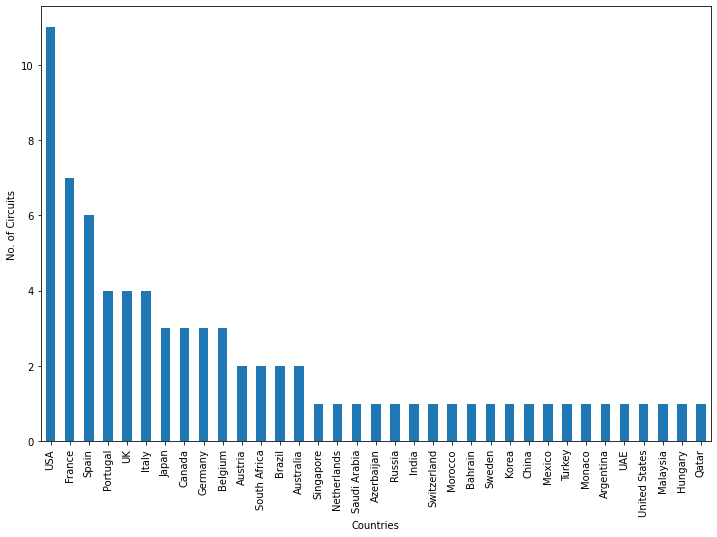

In [17]:
## Plot the number of circuits per country

fig, ax = plt.subplots(figsize=(12,8))

circuits['country'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Countries")
ax.set_ylabel("No. of Circuits")
ax.figure.savefig('Circuits per country.png', dpi=300)

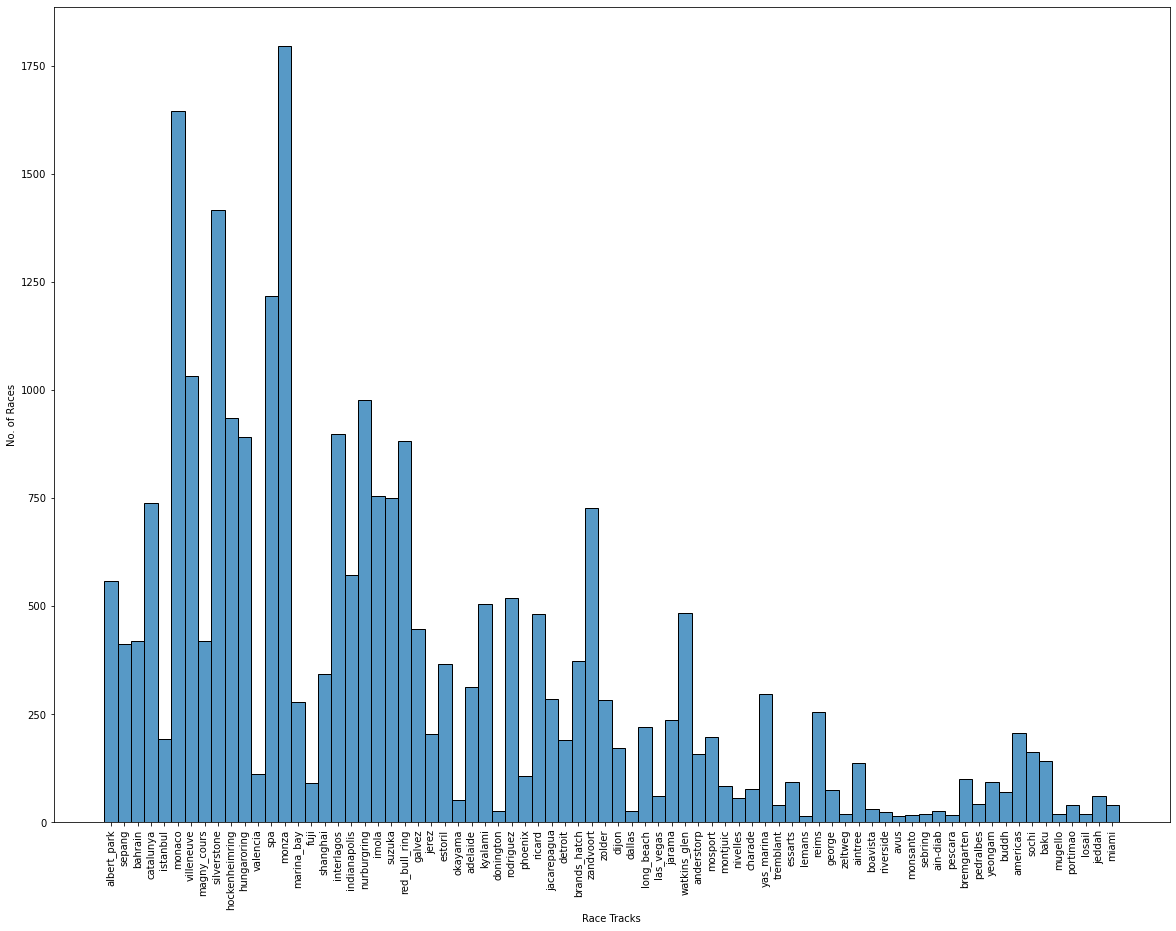

In [18]:
## Plotting a histogram of how many times an F1 race took place in each circuit

plt.figure(figsize=(20,15))
ax=sns.histplot(driver_race_data, x = 'circuitRef', bins=driver_race_data['circuitRef'].nunique())
plt.xticks(rotation='90')
ax.set_xlabel("Race Tracks")
ax.set_ylabel("No. of Races")
ax.figure.savefig('No. of races per Track.png', dpi=300)

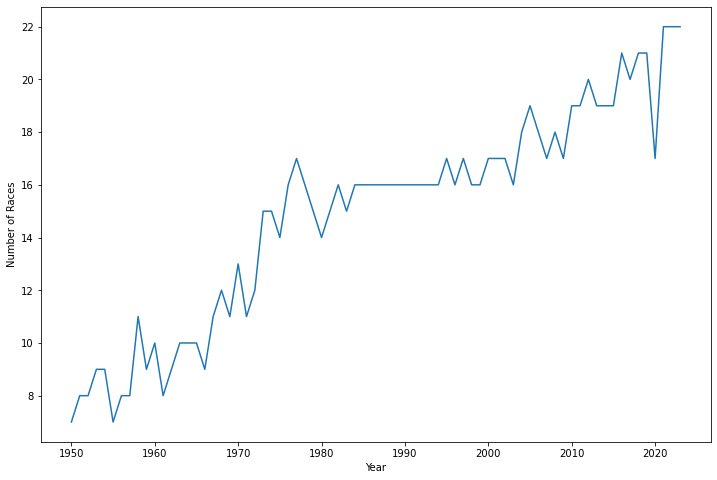

In [19]:
## Getting the number of races per year now

years = races.groupby('year').round.max().reset_index()['year'].tolist()
rounds = races.groupby('year').round.max().reset_index()['round'].tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(years, rounds)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Races")
ax.figure.savefig('Number of races per year.png', dpi=300)

In [20]:
# Creating race wins graph for last 20 years
race_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']!=0)]
race_wins_total = race_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

driver_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']==1)]
driver_wins_total = driver_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

perc_wins = pd.merge(race_wins_total,driver_wins_total, how='left', on='driver')
perc_wins = perc_wins.rename(columns={'finishing_position_x':'races','finishing_position_y':'wins'})
perc_wins['win_percent'] = ((perc_wins['wins'] / perc_wins['races']) * 100)
perc_wins = perc_wins.sort_values(ascending=False, by='win_percent')

## Converting index to list 
x_axis = perc_wins.index.tolist()
y_axis = perc_wins.groupby(['driver'], sort=False)['win_percent'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

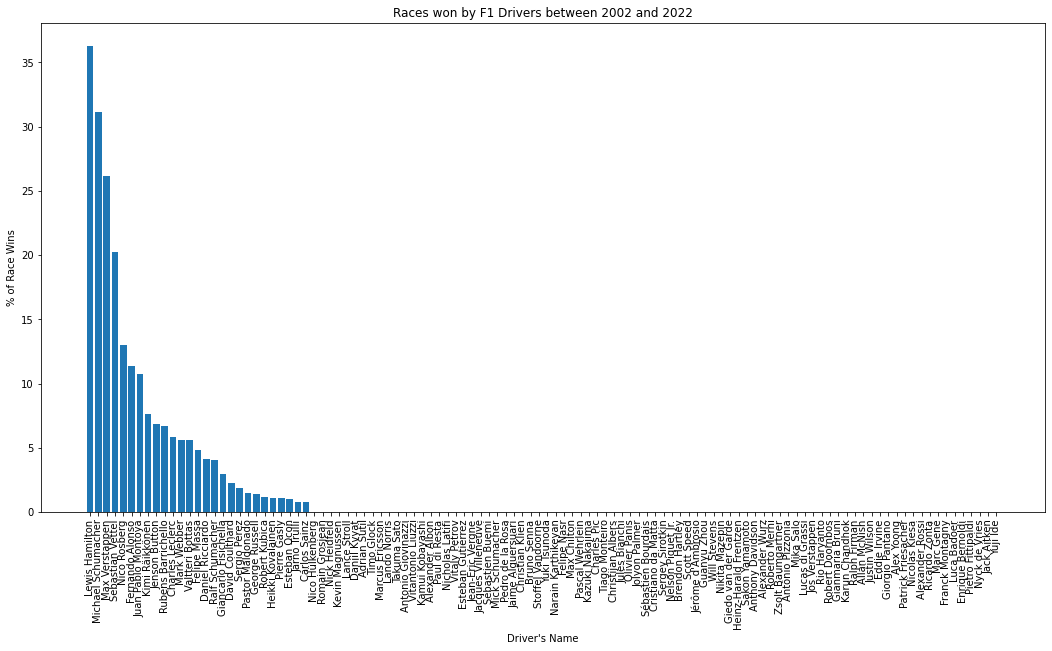

In [21]:
fig = plt.figure()
plt.figure(figsize=(18,9))
plt.bar(x_axis, y_axis)
plt.title('Races won by F1 Drivers between 2002 and 2022')
plt.xlabel("Driver's Name")
plt.ylabel("% of Race Wins")
plt.xticks(rotation=90);
plt.savefig('Percentage of Wins per Driver.png', dpi=300)

In [22]:
## Getting the driver age data based on DOB & Race date columns
driver_race_data[['dob','date']] = driver_race_data[['dob','date']].apply(pd.to_datetime)
driver_race_data['driver_age'] = (driver_race_data['date'] - driver_race_data['dob']) / np.timedelta64(1, 'Y')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/06/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/07/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/10/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/1979' in DD/MM/YYYY format. Provide format or specif

In [23]:
print(driver_race_data.dtypes)

raceId                         int64
driverId                       int64
constructorId                  int64
starting_position              int64
finishing_position             int64
points                       float64
milliseconds                   int64
statusId                       int64
forename                      object
surname                       object
dob                   datetime64[ns]
driver_nationality            object
year                           int64
round                          int64
circuitId                      int64
GP_name                       object
date                  datetime64[ns]
time_y                        object
circuitRef                    object
country                       object
constructor_name              object
winner                         int32
podium                         int64
driver                        object
driver_age                   float64
dtype: object


In [24]:
## Checking float values from Driver Age
driver_race_data['driver_age'].head()

0    22.708201
1    30.445526
2    22.719152
3    26.631621
4    26.407113
Name: driver_age, dtype: float64

In [25]:
driver_race_data['driver_age'] = driver_race_data['driver_age'].astype(int)
driver_race_data['driver_age'].head()

0    22
1    30
2    22
3    26
4    26
Name: driver_age, dtype: int32

In [26]:
driver_race_data['finishing_position'].head(20)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: finishing_position, dtype: int64

In [27]:
## Plotting a histogram of driver wins from pole position
driver_pole_wins = pd.concat([driver_race_data['winner'], driver_race_data['starting_position'], driver_race_data['finishing_position']], axis=1)
driver_pole_wins.head(10)

,winner,starting_position,finishing_position
0,1,1,1
1,0,5,2
2,0,7,3
3,0,11,4
4,0,3,5
5,0,13,6
6,0,17,7
7,0,15,8
8,0,2,0
9,0,18,0


<Figure size 432x288 with 0 Axes>

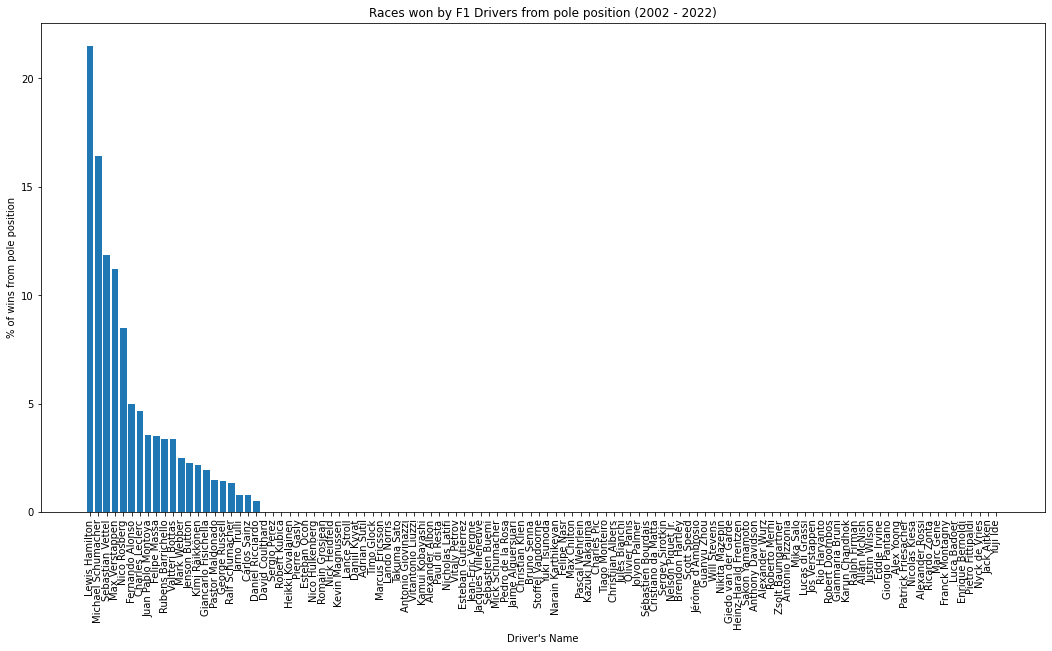

In [28]:
## Creating pole position wins graph for last 20 years
starting_position = driver_race_data.loc[(driver_race_data['year']>=2002) & 
                                         (driver_race_data['year']<2023) & 
                                         (driver_race_data['winner']==1) & 
                                         (driver_race_data['starting_position']==1)]
starting_position_total = starting_position.groupby(['driver'])['starting_position'].count().sort_values(ascending=False)

pole_winners = pd.merge(perc_wins,starting_position_total, how='left', on='driver')
pole_winners.drop(['wins', 'win_percent'], axis=1)
pole_winners['pole_percent'] = ((pole_winners['starting_position'] / perc_wins['races']) * 100)
pole_winners = pole_winners.sort_values(ascending=False, by='pole_percent')

## Converting index to list 
x_axis = pole_winners.index.tolist()
y_axis = pole_winners.groupby(['driver'], sort=False)['pole_percent'].sum().sort_values(ascending=False)

fig = plt.figure()
plt.figure(figsize=(18,9))
plt.bar(x_axis, y_axis)
plt.title('Races won by F1 Drivers from pole position (2002 - 2022)')
plt.xlabel("Driver's Name")
plt.ylabel("% of wins from pole position")
plt.xticks(rotation=90);
plt.savefig('Percentage of Wins from Pole Position.png', dpi=300)

Discuss with Supervisor

Correlation: 0.6714098740713691


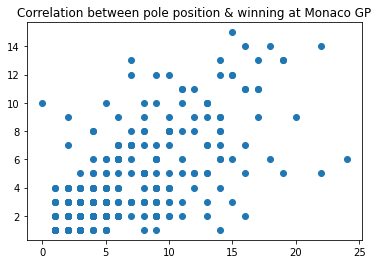

In [29]:
circuitsResults = pd.concat([merged_F1['circuitId'], merged_F1['grid'], merged_F1['positionOrder'], merged_F1['statusId']], axis=1)

x = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].grid
y = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].positionOrder

plt.scatter(x,y)
plt.title('Correlation between pole position & winning at Monaco GP')
plt.savefig('Correlation pole position win - Monaco.png', dpi=300)

print("Correlation:", x.corr(y))

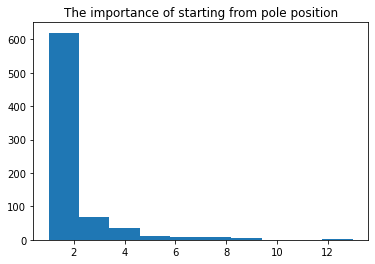

In [30]:
## Create graph to show the importance of pole poisition for all track winners

y = circuitsResults[(circuitsResults.grid == 1) & (circuitsResults.statusId == 1)].positionOrder
plt.hist(y)
plt.title('The importance of starting from pole position')
plt.savefig('Importance of starting from pole.png', dpi=300)

In [31]:
## Calculate the mean finishing position from the above
print("Mean finishing position from pole:", y.mean())

Mean finishing position from pole: 1.790513833992095


In [32]:
## Joining results, races and pitstop datasets
results_races = pd.merge(results,races, right_on='raceId', left_on='raceId', how='left')
pitstop_races = pit_stops.groupby(['raceId','driverId']).agg({'stop':'sum', 'milliseconds':'sum'})
pitstop_races.reset_index()

,raceId,driverId,stop,milliseconds
0,841,1,3,46426
1,841,2,3,48092
2,841,3,1,23716
3,841,4,6,72165
4,841,5,1,24865
...,...,...,...,...
4907,1109,848,3,43838
4908,1109,852,3,47351
4909,1109,855,3,52064
4910,1109,857,3,43201


In [33]:
## Merging the pitstop results with result and races on driverId and raceId
results_races = (results_races.merge(pitstop_races, right_on=['raceId','driverId'], left_on=['raceId','driverId'], how='right'))
results_races.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,stop,milliseconds_y
0,20780,841,1,1,3,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,\N,\N,\N,3,46426
1,20790,841,2,4,9,18,12,12,12,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,3,48092
2,20795,841,3,131,8,7,\N,R,17,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,1,23716
3,20782,841,4,6,5,5,4,4,4,12.0,...,\N,\N,\N,\N,\N,\N,\N,\N,6,72165
4,20796,841,5,205,20,19,\N,R,18,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,1,24865


In [34]:
## Now grouping the results with the constructorId
pitstop_results = results_races.groupby(['constructorId', 'circuitId']).agg({'raceId': 'count', 'stop':'sum', 'milliseconds_y':'sum', 'points': 'sum'})
pitstop_results.reset_index(inplace=True)

## Merge these with the constructor dataframe
# Merge pitstop_prob_results with constructors_df  on constructorId.
pitstop_results_constructor = (pitstop_results.merge(constructors, right_on='constructorId', left_on='constructorId', how='left'))
pitstop_results_constructor.head()

,constructorId,circuitId,raceId,stop,milliseconds_y,points,constructorRef,name,nationality,url
0,1,1,20,64,9129995,143.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,1,2,14,83,1055353,63.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,1,3,22,125,3825323,85.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,1,4,26,106,1299617,80.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,1,5,6,24,305145,41.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [35]:
pitstop_results_constructor = pitstop_results_constructor.rename(columns={'milliseconds_y': 'milliseconds'})

In [36]:
## Now I want to get the stops, time, points used/gained per race based on pitstop data
pitstop_results_constructor['stopsPerRace'] = round(pitstop_results_constructor.stop/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['timePerRace'] = round(pitstop_results_constructor.milliseconds/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['pointsPerRace'] = round(pitstop_results_constructor.points/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor.head(10)

,constructorId,circuitId,raceId,stop,milliseconds,points,constructorRef,name,nationality,url,stopsPerRace,timePerRace,pointsPerRace
0,1,1,20,64,9129995,143.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.20,456499.75,7.15
1,1,2,14,83,1055353,63.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.93,75382.36,4.50
2,1,3,22,125,3825323,85.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.68,173878.32,3.86
3,1,4,26,106,1299617,80.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.08,49985.27,3.08
4,1,5,6,24,305145,41.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.00,50857.50,6.83
5,1,6,24,57,3278066,101.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2.38,136586.08,4.21
6,1,7,19,64,879033,64.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.37,46264.89,3.37
7,1,9,27,87,11630380,120.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.22,430754.81,4.44
8,1,10,10,51,539074,38.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.10,53907.40,3.80
9,1,11,26,116,2734388,158.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.46,105168.77,6.08


In [37]:
pitstop_results_constructor = pitstop_results_constructor.drop(['constructorRef','nationality','url'], axis=1)
pitstop_results_constructor

,constructorId,circuitId,raceId,stop,milliseconds,points,name,stopsPerRace,timePerRace,pointsPerRace
0,1,1,20,64,9129995,143.0,McLaren,3.20,456499.75,7.15
1,1,2,14,83,1055353,63.0,McLaren,5.93,75382.36,4.50
2,1,3,22,125,3825323,85.0,McLaren,5.68,173878.32,3.86
3,1,4,26,106,1299617,80.0,McLaren,4.08,49985.27,3.08
4,1,5,6,24,305145,41.0,McLaren,4.00,50857.50,6.83
...,...,...,...,...,...,...,...,...,...,...
590,214,73,5,16,2175089,15.0,Alpine F1 Team,3.20,435017.80,3.00
591,214,75,2,12,140063,10.0,Alpine F1 Team,6.00,70031.50,5.00
592,214,77,6,17,4332759,26.0,Alpine F1 Team,2.83,722126.50,4.33
593,214,78,2,2,51508,25.0,Alpine F1 Team,1.00,25754.00,12.50


In [38]:
## Getting the data specifically for the Red Bull team
pitstop_constructor_rb = pitstop_results_constructor[(pitstop_results_constructor['constructorId']==9)]

In [39]:
## Now set the Red Bull correlation matrix
RB_corr = pitstop_constructor_rb.drop(columns=['constructorId', 'raceId']).corr()
RB_corr

,circuitId,stop,milliseconds,points,stopsPerRace,timePerRace,pointsPerRace
circuitId,1.000000,-0.564716,-0.309310,-0.518769,-0.027515,0.227443,0.271704
stop,-0.564716,1.000000,0.487157,0.782577,0.206054,-0.123264,-0.346536
milliseconds,-0.309310,0.487157,1.000000,0.415751,0.069687,0.291885,-0.321491
points,-0.518769,0.782577,0.415751,1.000000,-0.218190,-0.255461,-0.230022
stopsPerRace,-0.027515,0.206054,0.069687,-0.218190,1.000000,0.708226,0.012667
timePerRace,0.227443,-0.123264,0.291885,-0.255461,0.708226,1.000000,0.037990
pointsPerRace,0.271704,-0.346536,-0.321491,-0.230022,0.012667,0.037990,1.000000


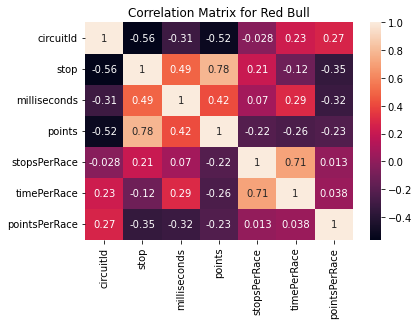

<Figure size 432x288 with 0 Axes>

In [40]:
## Generating heatmap of this correlation
sns.heatmap(RB_corr, annot=True)
plt.title('Correlation Matrix for Red Bull')
plt.show()
plt.savefig('Red Bull Correlation Matrix - Pitstops.png', dpi=300)

In [41]:
## Getting the number of accidents based on status

accidents_df = pd.DataFrame(merged_F1.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status':'status_amount'}).reset_index()
accidents_df.head(5)

,year,circuitRef,status,status_amount
0,1950,bremgarten,+2 Laps,3
1,1950,bremgarten,+3 Laps,3
2,1950,bremgarten,Accident,2
3,1950,bremgarten,Engine,2
4,1950,bremgarten,Finished,2


In [42]:
## Getting the number of accidents and collisions per circuit per year

accidents_c = accidents_df[accidents_df['status'].isin(['Accident', 'Collision'])]
accidents_collisions = pd.DataFrame(accidents_c.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status' : 'status_count'}).reset_index()
accidents_collisions.head()

,year,circuitRef,status,status_count
0,1950,bremgarten,Accident,1
1,1950,monaco,Accident,1
2,1950,monaco,Collision,1
3,1951,bremgarten,Accident,1
4,1951,indianapolis,Accident,1


C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_16244\555573421.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


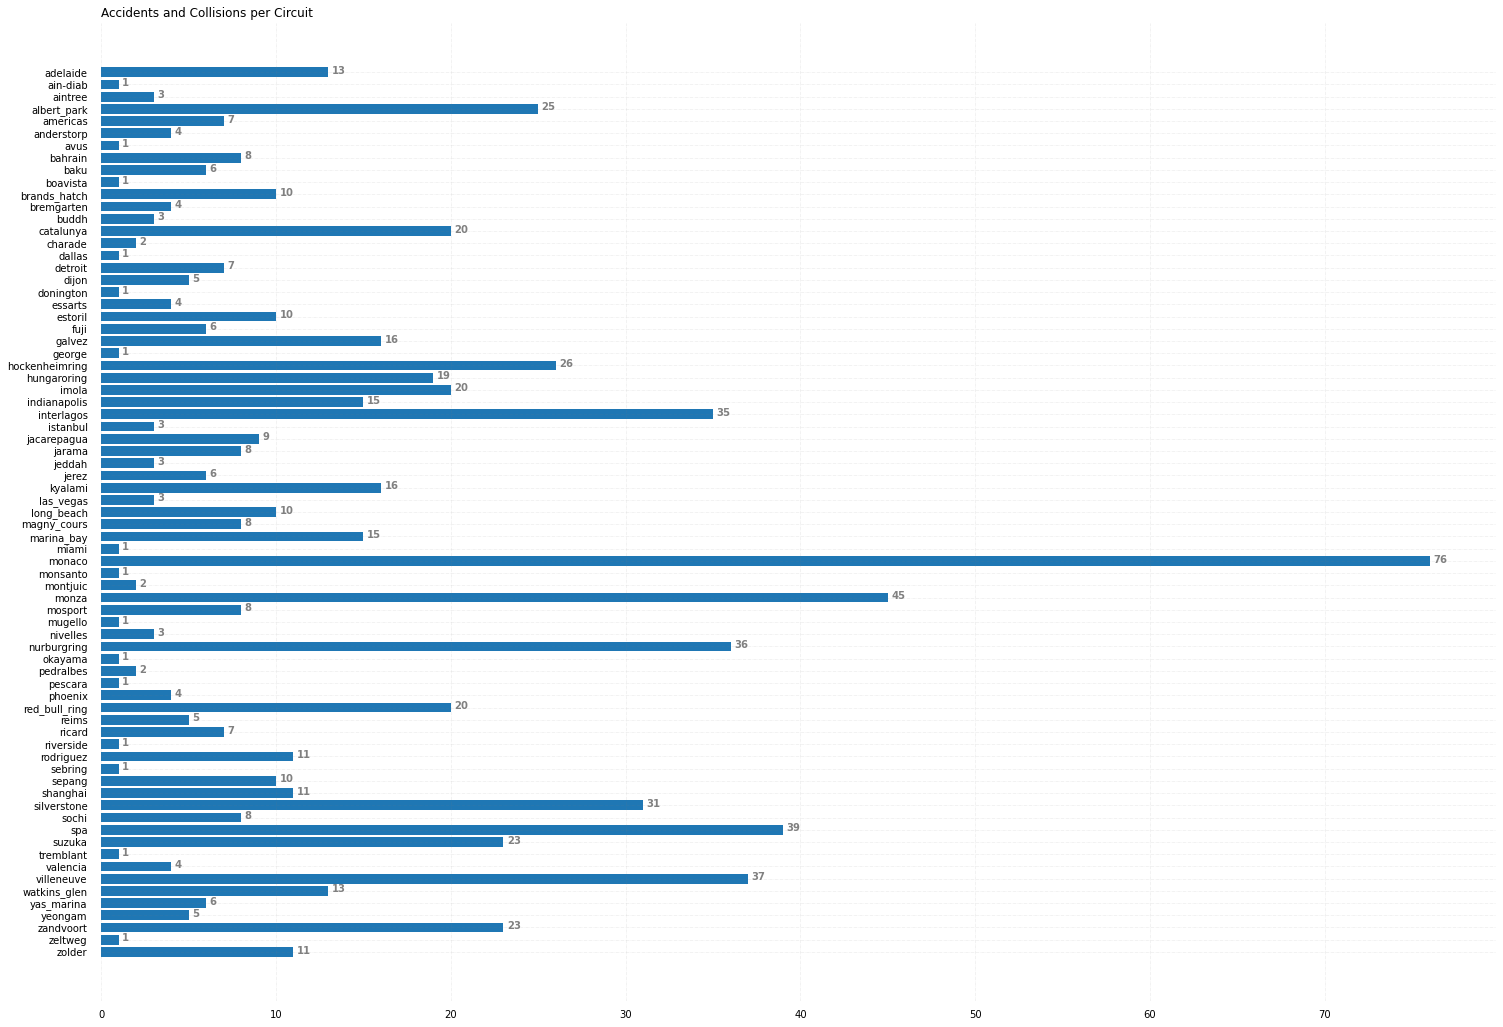

In [43]:
total_accidents_c = pd.DataFrame(accidents_collisions.groupby('circuitRef')['status_count'].sum()).reset_index()

trackName = total_accidents_c['circuitRef']
accidentCount = total_accidents_c['status_count']
 
fig, ax = plt.subplots(figsize =(25, 18))
 
## Creating a horizontal Bar Plot
ax.barh(trackName, accidentCount)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
## Display the top values
ax.invert_yaxis()
 
# Adding annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Accidents and Collisions per Circuit',
             loc ='left', )
plt.show()
ax.figure.savefig('Accidents and Collisions per Circuit.png', dpi=300)

In [44]:
## Getting the number of drivers who raced on circuit
## Changing circuitRef to driver_count as each circuitRef value accounts for one driver
total_driver_accident_c = pd.DataFrame(merged_F1['circuitRef'].value_counts()).reset_index().rename(columns = {'circuitRef' : 'driver_count', 'index': 'circuitRef'})

In [45]:
## Now the accidents per circuit rate of each
accident_circuit_rate = pd.merge(total_accidents_c, total_driver_accident_c, how = 'left', on = 'circuitRef')
accident_circuit_rate['accident_count'] = round(accident_circuit_rate['status_count'] / accident_circuit_rate['driver_count'], 
                                                2)
accident_circuit_rate.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_circuit_rate.head()

,circuitRef,status_count,driver_count,accident_count
21,fuji,6,91,0.07
6,avus,1,15,0.07
50,pescara,1,16,0.06
41,monsanto,1,16,0.06
36,long_beach,10,220,0.05


In [46]:
## Getting the total accidents/collisions per year
accidents_collisions_years = pd.DataFrame(accidents_collisions.groupby('year')['status_count'].sum()).reset_index()
accidents_collisions_years.head(10)

,year,status_count
0,1950,3
1,1951,5
2,1952,3
3,1953,4
4,1954,7
5,1955,3
6,1956,7
7,1957,5
8,1958,8
9,1959,7


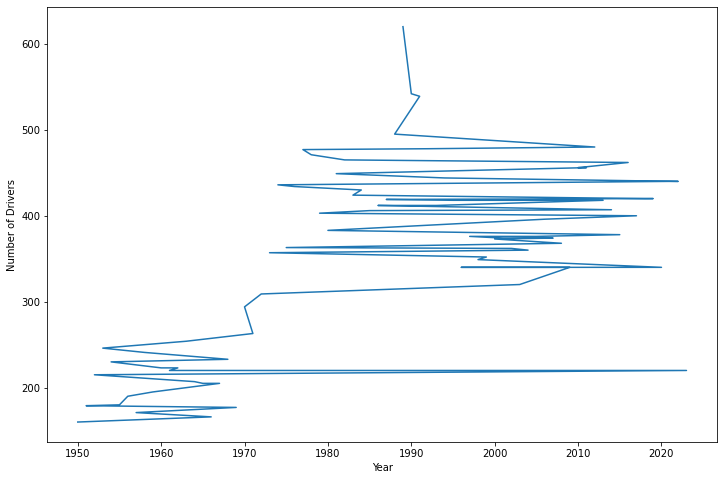

In [47]:
## Getting the total driver count per year
accidents_collisions_drivers = pd.DataFrame(merged_F1['year'].value_counts()).reset_index().rename(columns = {'year': 'driver_count', 'index': 'year'}) #total participants per year

driver_count = accidents_collisions_drivers['driver_count']
year = accidents_collisions_drivers['year']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(year, driver_count)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Drivers")
ax.figure.savefig('Number of drivers per year.png', dpi=300)

In [48]:
## Getting the accident rate per year based on the above dataframes
accident_count_years = pd.merge(accidents_collisions_years, accidents_collisions_drivers, how = 'left', on = 'year')
accident_count_years['accident_count'] = round(accident_count_years['status_count'] / accident_count_years['driver_count'], 2)
accident_count_years.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_count_years.head(15)

,year,status_count,driver_count,accident_count
58,2008,22,368,0.06
60,2010,22,456,0.05
57,2007,18,374,0.05
32,1982,17,465,0.04
24,1974,16,436,0.04
26,1976,17,434,0.04
29,1979,16,403,0.04
63,2013,16,418,0.04
31,1981,19,449,0.04
27,1977,17,477,0.04


In [49]:
accident_count_years.drop(['status_count', 'driver_count'], axis=1)

,year,accident_count
58,2008,0.06
60,2010,0.05
57,2007,0.05
32,1982,0.04
24,1974,0.04
...,...,...
42,1992,0.02
73,2023,0.02
15,1965,0.01
41,1991,0.01


In [50]:
accident_count_years.to_csv('accident_count_years.csv')

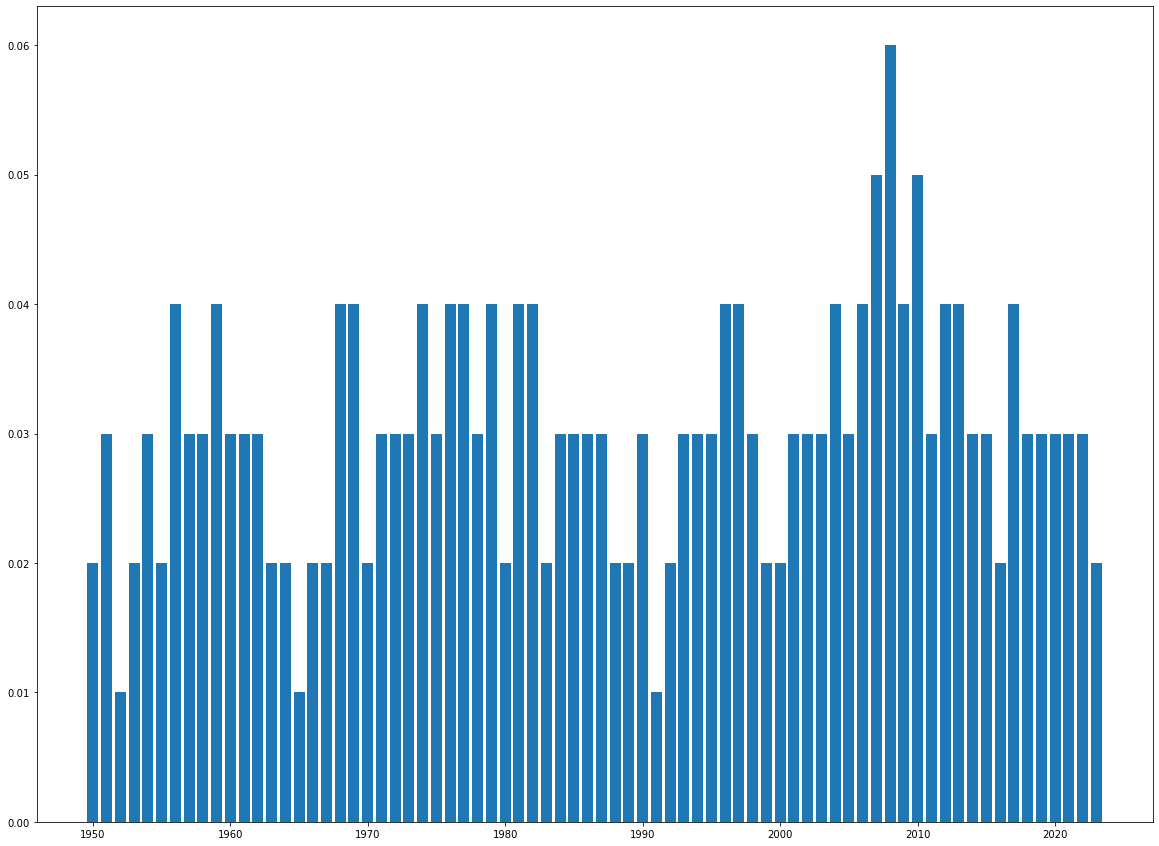

In [51]:
## Creating a bar chart of the newly formed dataframe
plt.figure(figsize=(20,15))
plt.bar(accident_count_years.year , accident_count_years.accident_count)
ax.set_xlabel("Race Year")
ax.set_ylabel("Accident Rate")
plt.show()
ax.figure.savefig('Accident Rate per Year.png', dpi=300)

In [52]:
## Want to generate a map of all circuits so confirming column names

circuits.head(5)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [53]:
import folium

coords = []

for lat,lng in zip(circuits['lat'],circuits['lng']):
    coords.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='OpenStreetMap')  
for i,j in zip(coords,circuits.name):
    marker = folium.Circle(
        location=i,
        radius=1000,
        popup="<strong>{0}</strong>".format(j))
    marker.add_to(maps)
maps

# Machine Learning

In [54]:
from sklearn.model_selection import train_test_split

## For missing data & data conversion
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

## For encoding using feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualWidthDiscretiser

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
## Merging the datasets again based on the chosen columns

ML_df = pd.merge(results, races[['raceId', 'date', 'name', 'round']], on='raceId', how='left')
ML_df1 = pd.merge(ML_df, drivers[['driverId', 'forename', 'surname', 'dob', 'nationality']], on='driverId', how='left')
ML_df2 = pd.merge(ML_df1, pit_stops[['raceId', 'driverId', 'duration']], on=['raceId','driverId'], how='left')
ML_df3 = pd.merge(ML_df2, constructors[['constructorId', 'name']], on='constructorId', how='left')
ML_df4 = pd.merge(ML_df3, qualifying[['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3']], 
                  on=['raceId', 'driverId', 'constructorId'], how='left')
ML_data = pd.merge(ML_df4, status[['statusId', 'status']], on='statusId', how='left')
ML_data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,forename,surname,dob,nationality,duration,name_y,q1,q2,q3,status
0,1,18,1,1,22,1,1,1,1,10.0,...,Lewis,Hamilton,1985-01-07,British,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,Nick,Heidfeld,1977-05-10,German,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,Nico,Rosberg,1985-06-27,German,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,Fernando,Alonso,1981-07-29,Spanish,NaN,Renault,1:26.907,1:26.188,\N,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,Heikki,Kovalainen,1981-10-19,Finnish,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished
5,6,18,6,3,8,13,6,6,6,3.0,...,Kazuki,Nakajima,1985-01-11,Japanese,NaN,Williams,1:26.891,1:26.413,\N,+1 Lap
6,7,18,7,5,14,17,7,7,7,2.0,...,Sébastien,Bourdais,1979-02-28,French,NaN,Toro Rosso,1:27.446,\N,\N,Engine
7,8,18,8,6,1,15,8,8,8,1.0,...,Kimi,Räikkönen,1979-10-17,Finnish,NaN,Ferrari,1:26.140,\N,\N,Engine
8,9,18,9,2,4,2,\N,R,9,0.0,...,Robert,Kubica,1984-12-07,Polish,NaN,BMW Sauber,1:26.103,1:25.315,1:26.869,Collision
9,10,18,10,7,12,18,\N,R,10,0.0,...,Timo,Glock,1982-03-18,German,NaN,Toyota,1:26.919,1:26.164,1:29.593,Accident


In [56]:
ML_data.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
date                   0
name_x                 0
round                  0
forename               0
surname                0
dob                    0
nationality            0
duration           21148
name_y                 0
q1                 16311
q2                 16581
q3                 16848
status                 0
dtype: int64

duration           0.677821
q3                 0.540000
q2                 0.531442
q1                 0.522788
resultId           0.000000
fastestLapSpeed    0.000000
name_y             0.000000
nationality        0.000000
dob                0.000000
surname            0.000000
forename           0.000000
round              0.000000
name_x             0.000000
date               0.000000
statusId           0.000000
fastestLapTime     0.000000
raceId             0.000000
rank               0.000000
fastestLap         0.000000
milliseconds       0.000000
time               0.000000
laps               0.000000
points             0.000000
positionOrder      0.000000
positionText       0.000000
position           0.000000
grid               0.000000
number             0.000000
constructorId      0.000000
driverId           0.000000
status             0.000000
dtype: float64


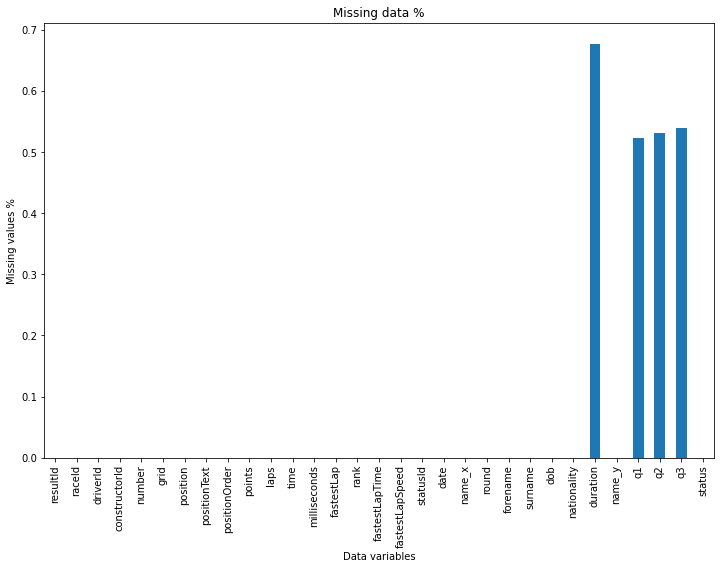

In [57]:
## Going to create a percentile graph of this missing data
print(ML_data.isnull().mean().sort_values(ascending=False))

ML_data.isnull().mean().plot.bar(figsize=(12,8))
plt.ylabel('Missing values %')
plt.xlabel('Data variables')
plt.title('Missing data %')
ax.figure.savefig('Percentage of missing data.png', dpi=300)

In [58]:
ML_data['driver'] = ML_data['forename']+' '+ML_data['surname']
ML_data['dob'] = pd.to_datetime(ML_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

ML_data[['dob','date']] = ML_data[['dob','date']].apply(pd.to_datetime)
ML_data['driver_age'] = (ML_data['date'] - ML_data['dob']) / np.timedelta64(1, 'Y')
ML_data.drop(['forename','surname'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/06/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/07/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/10/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/1979' in DD/MM/YYYY format. Provide format or specif

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,dob,nationality,duration,name_y,q1,q2,q3,status,driver,driver_age
0,1,18,1,1,22,1,1,1,1,10.0,...,1985-07-01,British,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished,Lewis Hamilton,22.708201
1,2,18,2,2,3,5,2,2,2,8.0,...,1977-10-05,German,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished,Nick Heidfeld,30.445526
2,3,18,3,3,7,7,3,3,3,6.0,...,1985-06-27,German,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished,Nico Rosberg,22.719152
3,4,18,4,4,5,11,4,4,4,5.0,...,1981-07-29,Spanish,NaN,Renault,1:26.907,1:26.188,\N,Finished,Fernando Alonso,26.631621
4,5,18,5,1,23,3,5,5,5,4.0,...,1981-10-19,Finnish,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished,Heikki Kovalainen,26.407113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31195,26062,1109,825,210,20,19,17,17,17,0.0,...,1992-05-10,Danish,22.152,Haas F1 Team,1:19.206,\N,\N,+1 Lap,Kevin Magnussen,31.201188
31196,26063,1109,858,3,2,20,\N,R,18,0.0,...,2000-12-31,American,24.001,Williams,1:19.248,\N,\N,Retired,Logan Sargeant,22.557616
31197,26063,1109,858,3,2,20,\N,R,18,0.0,...,2000-12-31,American,22.197,Williams,1:19.248,\N,\N,Retired,Logan Sargeant,22.557616
31198,26064,1109,839,214,31,12,\N,R,19,0.0,...,1996-09-17,French,NaN,Alpine F1 Team,1:18.854,1:17.841,\N,Collision damage,Esteban Ocon,26.845178


In [59]:
## Renaming columns for easier viewing
ML_data.rename(columns = {'name_x':'GP_name', 'rank':'fastest_lap_rank',
                     'name_y':'constructor_name', 'nationality':'driver_nationality', 
                     'milliseconds':'lap_time', 'duration':'pitstop_length'}, inplace=True)

In [60]:
## Dropping surplus columns
ML_data.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId',
        'constructorId', 'time'], axis=1, inplace=True)

## Replacing \N values
ML_data.replace(r'\N', np.nan, inplace=True)

In [61]:
ML_data.head(10)

,raceId,driverId,grid,positionOrder,points,lap_time,fastest_lap_rank,fastestLapTime,fastestLapSpeed,date,...,dob,driver_nationality,pitstop_length,constructor_name,q1,q2,q3,status,driver,driver_age
0,18,1,1,1,10.0,5690616,2,1:27.452,218.300,2008-03-16,...,1985-07-01,British,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished,Lewis Hamilton,22.708201
1,18,2,5,2,8.0,5696094,3,1:27.739,217.586,2008-03-16,...,1977-10-05,German,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished,Nick Heidfeld,30.445526
2,18,3,7,3,6.0,5698779,5,1:28.090,216.719,2008-03-16,...,1985-06-27,German,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished,Nico Rosberg,22.719152
3,18,4,11,4,5.0,5707797,7,1:28.603,215.464,2008-03-16,...,1981-07-29,Spanish,NaN,Renault,1:26.907,1:26.188,NaN,Finished,Fernando Alonso,26.631621
4,18,5,3,5,4.0,5708630,1,1:27.418,218.385,2008-03-16,...,1981-10-19,Finnish,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished,Heikki Kovalainen,26.407113
5,18,6,13,6,3.0,NaN,14,1:29.639,212.974,2008-03-16,...,1985-11-01,Japanese,NaN,Williams,1:26.891,1:26.413,NaN,+1 Lap,Kazuki Nakajima,22.371438
6,18,7,17,7,2.0,NaN,12,1:29.534,213.224,2008-03-16,...,1979-02-28,French,NaN,Toro Rosso,1:27.446,NaN,NaN,Engine,Sébastien Bourdais,29.046455
7,18,8,15,8,1.0,NaN,4,1:27.903,217.180,2008-03-16,...,1979-10-17,Finnish,NaN,Ferrari,1:26.140,NaN,NaN,Engine,Kimi Räikkönen,28.413999
8,18,9,2,9,0.0,NaN,9,1:28.753,215.100,2008-03-16,...,1984-07-12,Polish,NaN,BMW Sauber,1:26.103,1:25.315,1:26.869,Collision,Robert Kubica,23.677420
9,18,10,18,10,0.0,NaN,13,1:29.558,213.166,2008-03-16,...,1982-03-18,German,NaN,Toyota,1:26.919,1:26.164,1:29.593,Accident,Timo Glock,25.996427


In [62]:
## Converting driver_age to an integer/whole value

ML_data['driver_age'] = ML_data['driver_age'].astype(int)
ML_data

,raceId,driverId,grid,positionOrder,points,lap_time,fastest_lap_rank,fastestLapTime,fastestLapSpeed,date,...,dob,driver_nationality,pitstop_length,constructor_name,q1,q2,q3,status,driver,driver_age
0,18,1,1,1,10.0,5690616,2,1:27.452,218.300,2008-03-16,...,1985-07-01,British,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished,Lewis Hamilton,22
1,18,2,5,2,8.0,5696094,3,1:27.739,217.586,2008-03-16,...,1977-10-05,German,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished,Nick Heidfeld,30
2,18,3,7,3,6.0,5698779,5,1:28.090,216.719,2008-03-16,...,1985-06-27,German,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished,Nico Rosberg,22
3,18,4,11,4,5.0,5707797,7,1:28.603,215.464,2008-03-16,...,1981-07-29,Spanish,NaN,Renault,1:26.907,1:26.188,NaN,Finished,Fernando Alonso,26
4,18,5,3,5,4.0,5708630,1,1:27.418,218.385,2008-03-16,...,1981-10-19,Finnish,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished,Heikki Kovalainen,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31195,1109,825,19,17,0.0,NaN,16,1:23.864,188.061,2023-07-23,...,1992-05-10,Danish,22.152,Haas F1 Team,1:19.206,NaN,NaN,+1 Lap,Kevin Magnussen,31
31196,1109,858,20,18,0.0,NaN,12,1:23.496,188.890,2023-07-23,...,2000-12-31,American,24.001,Williams,1:19.248,NaN,NaN,Retired,Logan Sargeant,22
31197,1109,858,20,18,0.0,NaN,12,1:23.496,188.890,2023-07-23,...,2000-12-31,American,22.197,Williams,1:19.248,NaN,NaN,Retired,Logan Sargeant,22
31198,1109,839,12,19,0.0,NaN,0,NaN,NaN,2023-07-23,...,1996-09-17,French,NaN,Alpine F1 Team,1:18.854,1:17.841,NaN,Collision damage,Esteban Ocon,26


In [63]:
## Only need the race year from the date column now
ML_data['year'] = ML_data['date'].dt.year

## Dropping these columns now that the necessary data has been extracted
ML_data.drop(['dob', 'date', 'forename', 'surname'], axis=1, inplace=True)

In [64]:
## Reorder the columns now     
ML_data = ML_data[['raceId', 'year', 'GP_name', 'round', 'driverId', 'driver', 'driver_age', 'driver_nationality', 
         'constructor_name', 'grid', 'positionOrder', 'points', 'lap_time', 'q1', 'q2', 'q3',  
         'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'pitstop_length', 'status']]

In [65]:
ML_data.head(5)

,raceId,year,GP_name,round,driverId,driver,driver_age,driver_nationality,constructor_name,grid,...,points,lap_time,q1,q2,q3,fastest_lap_rank,fastestLapTime,fastestLapSpeed,pitstop_length,status
0,18,2008,Australian Grand Prix,1,1,Lewis Hamilton,22,British,McLaren,1,...,10.0,5690616,1:26.572,1:25.187,1:26.714,2,1:27.452,218.300,NaN,Finished
1,18,2008,Australian Grand Prix,1,2,Nick Heidfeld,30,German,BMW Sauber,5,...,8.0,5696094,1:25.960,1:25.518,1:27.236,3,1:27.739,217.586,NaN,Finished
2,18,2008,Australian Grand Prix,1,3,Nico Rosberg,22,German,Williams,7,...,6.0,5698779,1:26.295,1:26.059,1:28.687,5,1:28.090,216.719,NaN,Finished
3,18,2008,Australian Grand Prix,1,4,Fernando Alonso,26,Spanish,Renault,11,...,5.0,5707797,1:26.907,1:26.188,NaN,7,1:28.603,215.464,NaN,Finished
4,18,2008,Australian Grand Prix,1,5,Heikki Kovalainen,26,Finnish,McLaren,3,...,4.0,5708630,1:25.664,1:25.452,1:27.079,1,1:27.418,218.385,NaN,Finished


In [66]:
print(ML_data.dtypes)

raceId                  int64
year                    int64
GP_name                object
round                   int64
driverId                int64
driver                 object
driver_age              int32
driver_nationality     object
constructor_name       object
grid                    int64
positionOrder           int64
points                float64
lap_time               object
q1                     object
q2                     object
q3                     object
fastest_lap_rank       object
fastestLapTime         object
fastestLapSpeed        object
pitstop_length         object
status                 object
dtype: object


In [67]:
## Need to change the datatypes for certain values
ML_data.lap_time = ML_data.lap_time.astype(float)
ML_data.fastest_lap_rank = ML_data.fastest_lap_rank.astype(float)
ML_data.fastestLapSpeed = ML_data.fastestLapSpeed.astype(float)

variable = ['q1', 'q2', 'q3']
for i in variable:
    ML_data[i] = pd.to_datetime(ML_data[i],errors = 'coerce')

pd.to_datetime(ML_data.q1)
ML_data['q1'] = ML_data['q1'].dt.time

pd.to_datetime(ML_data.q2)
ML_data['q2'] = ML_data['q2'].dt.time

pd.to_datetime(ML_data.q3)
ML_data['q3'] = ML_data['q3'].dt.time

ML_data['lap_time'] = pd.to_datetime(ML_data['lap_time'], unit='ms').dt.strftime('%H:%M:%S')

ML_data.year = ML_data.year.astype(int)

ML_data.reset_index(drop=True, inplace=True)

In [68]:
print(sorted(ML_data['year'].unique()))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [69]:
ML_data = pd.merge(ML_data, weather, how='right', on=['year', 'round'])

In [70]:
ML_data.head(10)

,raceId,year,GP_name,round,driverId,driver,driver_age,driver_nationality,constructor_name,grid,...,fastestLapSpeed,pitstop_length,status,circuit_id,weather_conditions,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,833,1950,British Grand Prix,1,642,Nino Farina,43,Italian,Alfa Romeo,1,...,NaN,NaN,Finished,silverstone,"Sunny, mild, dry.",0,0,0,0,0
1,833,1950,British Grand Prix,1,786,Luigi Fagioli,51,Italian,Alfa Romeo,2,...,NaN,NaN,Finished,silverstone,"Sunny, mild, dry.",0,0,0,0,0
2,833,1950,British Grand Prix,1,686,Reg Parnell,39,British,Alfa Romeo,4,...,NaN,NaN,Finished,silverstone,"Sunny, mild, dry.",0,0,0,0,0
3,833,1950,British Grand Prix,1,704,Yves Cabantous,45,French,Talbot-Lago,6,...,NaN,NaN,+2 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
4,833,1950,British Grand Prix,1,627,Louis Rosier,45,French,Talbot-Lago,9,...,NaN,NaN,+2 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
5,833,1950,British Grand Prix,1,619,Bob Gerard,36,British,ERA,13,...,NaN,NaN,+3 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
6,833,1950,British Grand Prix,1,787,Cuth Harrison,43,British,ERA,15,...,NaN,NaN,+3 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
7,833,1950,British Grand Prix,1,741,Philippe Étancelin,53,French,Talbot-Lago,14,...,NaN,NaN,+5 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
8,833,1950,British Grand Prix,1,784,David Hampshire,32,British,Maserati,16,...,NaN,NaN,+6 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0
9,833,1950,British Grand Prix,1,778,Brian Shawe Taylor,35,British,Maserati,20,...,NaN,NaN,+6 Laps,silverstone,"Sunny, mild, dry.",0,0,0,0,0


In [71]:
## Drop the unnecessary weather columns added
ML_data = ML_data.drop(['circuit_id', 'weather_conditions'], axis=1)

In [72]:
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30773 entries, 0 to 30772
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raceId              30773 non-null  int64  
 1   year                30773 non-null  int32  
 2   GP_name             30773 non-null  object 
 3   round               30773 non-null  int64  
 4   driverId            30773 non-null  int64  
 5   driver              30773 non-null  object 
 6   driver_age          30773 non-null  int32  
 7   driver_nationality  30773 non-null  object 
 8   constructor_name    30773 non-null  object 
 9   grid                30773 non-null  int64  
 10  positionOrder       30773 non-null  int64  
 11  points              30773 non-null  float64
 12  lap_time            9805 non-null   object 
 13  q1                  14277 non-null  object 
 14  q2                  8713 non-null   object 
 15  q3                  5390 non-null   object 
 16  fast

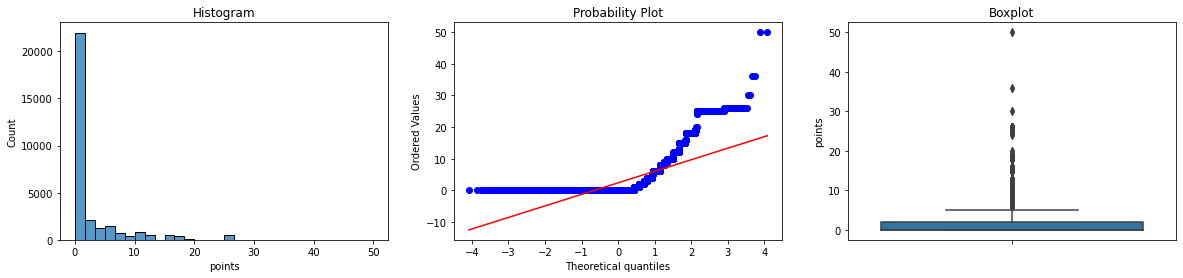

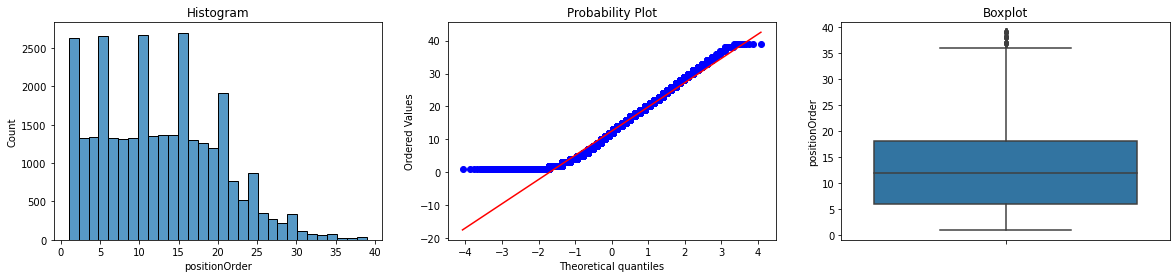

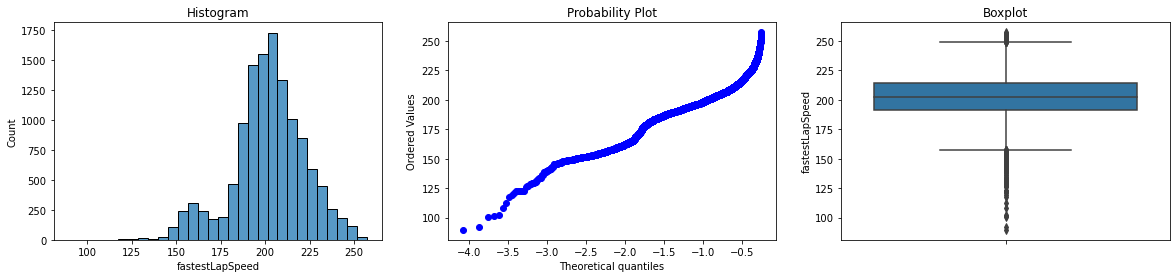

In [73]:
## Creating diagnostic plots (multiple linear regression - prediction errors vs prediction values)

def diagnostic_plots(ML_data, variable):
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(ML_data[variable], bins=30)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=ML_data[variable])
    plt.title('Boxplot')

    plt.subplot(1, 3, 2)
    stats.probplot(ML_data[variable], dist="norm", plot=plt)
    plt.show()
    
diagnostic_plots(ML_data, 'points')
diagnostic_plots(ML_data, 'positionOrder')
diagnostic_plots(ML_data, 'fastestLapSpeed')

In [75]:
## Setting the testing and training sets with focus variable being points

X_train, X_test, y_train, y_test = train_test_split(ML_data.drop(['points', 'raceId', 'status'], axis=1), 
    ML_data['points'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((21541, 23), (9232, 23))

In [76]:
## Must address any missing values within the data

missing_col = [n for n in X_train.columns if ML_data[n].dtypes!='O']
X_train[missing_col].isnull().mean().sort_values()

year                0.000000
round               0.000000
driverId            0.000000
driver_age          0.000000
grid                0.000000
positionOrder       0.000000
weather_warm        0.000000
weather_cold        0.000000
weather_dry         0.000000
weather_wet         0.000000
weather_cloudy      0.000000
fastest_lap_rank    0.595469
fastestLapSpeed     0.602572
dtype: float64

In [77]:
number_features = ['fastestLapSpeed', 'fastest_lap_rank']

## Using ArbitraryNumberImputer to replace missing values with arbitrary ones
imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=number_features)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-1,
                       variables=['fastestLapSpeed', 'fastest_lap_rank'])

In [78]:
## Imputing the data into the set

X_train_number = imputer.transform(X_train)
X_test_number = imputer.transform(X_test)

X_test_number

,year,GP_name,round,driverId,driver,driver_age,driver_nationality,constructor_name,grid,positionOrder,...,q3,fastest_lap_rank,fastestLapTime,fastestLapSpeed,pitstop_length,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
7597,1979,South African Grand Prix,3,173,Elio de Angelis,20,Italian,Shadow,15,22,...,NaT,-1.0,NaN,-1.000,NaN,0,0,0,1,0
26895,2017,Hungarian Grand Prix,11,828,Marcus Ericsson,27,Swedish,Sauber,20,16,...,NaT,10.0,1:21.752,192.920,24.097,1,0,0,0,0
19546,2007,Belgian Grand Prix,14,14,David Coulthard,36,British,Red Bull,11,20,...,NaT,17.0,1:51.156,226.837,NaN,1,0,1,0,0
13526,1992,South African Grand Prix,1,94,Pierluigi Martini,30,Italian,Dallara,25,16,...,NaT,-1.0,NaN,-1.000,NaN,0,0,1,0,0
3832,1968,British Grand Prix,7,289,Graham Hill,39,British,Lotus-Ford,1,14,...,NaT,-1.0,NaN,-1.000,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29910,2021,Abu Dhabi Grand Prix,22,1,Lewis Hamilton,36,British,Mercedes,2,2,...,01:22:28,3.0,1:26.615,219.495,21.595,1,0,0,0,0
2929,1964,Monaco Grand Prix,1,397,Peter Arundell,31,British,Lotus-Climax,6,3,...,NaT,-1.0,NaN,-1.000,NaN,0,0,0,0,0
30116,2022,Spanish Grand Prix,6,846,Lando Norris,22,British,McLaren,11,8,...,NaT,5.0,1:25.619,196.568,23.341,1,0,0,0,0
4424,1971,South African Grand Prix,1,280,Henri Pescarolo,28,French,March-Ford,18,11,...,NaT,-1.0,NaN,-1.000,NaN,0,0,1,0,0


In [79]:
## Doing the same now for categorical variables

category_features = [c for c in X_train.columns if ML_data[c].dtypes=='O']
X_train[category_features].isnull().mean().sort_values()

GP_name               0.000000
driver                0.000000
driver_nationality    0.000000
constructor_name      0.000000
q1                    0.538137
fastestLapTime        0.602572
lap_time              0.680052
pitstop_length        0.688362
q2                    0.718908
q3                    0.824938
dtype: float64

In [80]:
category_variables = ['q1', 'fastestLapTime', 'lap_time', 'pitstop_length', 'q2', 'q3']

In [81]:
## The Scikit-learn pipeline is a tool that links all steps of data manipulation together to create a pipeline

pipe = Pipeline(steps=[
    ('impute_missing_category', mdi.CategoricalImputer(variables = category_variables, imputation_method='missing'))])
pipe.fit(X_train_number)

Pipeline(steps=[('impute_missing_category',
                 CategoricalImputer(variables=['q1', 'fastestLapTime',
                                               'lap_time', 'pitstop_length',
                                               'q2', 'q3']))])

In [82]:
X_train_category = pipe.transform(X_train_number)
X_test_category = pipe.transform(X_test_number)

In [83]:
X_train_category

,year,GP_name,round,driverId,driver,driver_age,driver_nationality,constructor_name,grid,positionOrder,...,q3,fastest_lap_rank,fastestLapTime,fastestLapSpeed,pitstop_length,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
7843,1979,Italian Grand Prix,13,207,Mario Andretti,39,American,Team Lotus,10,5,...,Missing,-1.0,Missing,-1.00,Missing,1,0,1,0,0
226,1951,Belgian Grand Prix,3,641,Piero Taruffi,44,Italian,Ferrari,5,12,...,Missing,-1.0,Missing,-1.00,Missing,0,0,1,0,0
27988,2019,Monaco Grand Prix,6,848,Alexander Albon,23,Thai,Toro Rosso,10,8,...,01:11:39,3.0,1:15.607,158.89,25.062,0,0,0,0,1
13224,1991,British Grand Prix,8,87,Mark Blundell,24,British,Brabham,12,15,...,Missing,-1.0,Missing,-1.00,Missing,1,0,0,0,0
8899,1982,Monaco Grand Prix,6,202,Didier Pironi,30,French,Ferrari,5,2,...,Missing,-1.0,Missing,-1.00,Missing,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1991,Canadian Grand Prix,5,103,Éric Bernard,26,French,Lola,19,16,...,Missing,-1.0,Missing,-1.00,Missing,1,0,0,0,0
19648,2008,Malaysian Grand Prix,2,21,Giancarlo Fisichella,35,Italian,Force India,17,12,...,Missing,16.0,1:36.962,205.80,Missing,0,0,0,0,1
9845,1984,Detroit Grand Prix,8,185,Stefan Bellof,26,German,Tyrrell,16,10,...,Missing,-1.0,Missing,-1.00,Missing,1,0,0,0,0
10799,1986,Italian Grand Prix,13,166,Philippe Streiff,31,French,Tyrrell,23,9,...,Missing,-1.0,Missing,-1.00,Missing,0,0,1,0,0


In [84]:
## Going to use One-Hot encoding to transform categorical variables into binary for ML

ML_OHE = OneHotEncoder(
    top_categories=6,  ## Six category variables highlighted above

    variables=['driver'],   ## Encoding on the driver variable
    
    drop_last=False)
ML_OHE.fit(X_train_category)

OneHotEncoder(top_categories=6, variables=['driver'])

In [85]:
## Transform the encoded data into the train/test set

X_train_category = ML_OHE.transform(X_train_category)
X_test_category = ML_OHE.transform(X_test_category)
X_test_category

,year,GP_name,round,driverId,driver_age,driver_nationality,constructor_name,grid,positionOrder,lap_time,...,weather_cold,weather_dry,weather_wet,weather_cloudy,driver_Fernando Alonso,driver_Lewis Hamilton,driver_Sebastian Vettel,driver_Kimi Räikkönen,driver_Felipe Massa,driver_Jenson Button
7597,1979,South African Grand Prix,3,173,20,Italian,Shadow,15,22,Missing,...,0,0,1,0,0,0,0,0,0,0
26895,2017,Hungarian Grand Prix,11,828,27,Swedish,Sauber,20,16,Missing,...,0,0,0,0,0,0,0,0,0,0
19546,2007,Belgian Grand Prix,14,14,36,British,Red Bull,11,20,Missing,...,0,1,0,0,0,0,0,0,0,0
13526,1992,South African Grand Prix,1,94,30,Italian,Dallara,25,16,Missing,...,0,1,0,0,0,0,0,0,0,0
3832,1968,British Grand Prix,7,289,39,British,Lotus-Ford,1,14,Missing,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29910,2021,Abu Dhabi Grand Prix,22,1,36,British,Mercedes,2,2,01:30:19,...,0,0,0,0,0,1,0,0,0,0
2929,1964,Monaco Grand Prix,1,397,31,British,Lotus-Climax,6,3,Missing,...,0,0,0,0,0,0,0,0,0,0
30116,2022,Spanish Grand Prix,6,846,22,British,McLaren,11,8,01:38:43,...,0,0,0,0,0,0,0,0,0,0
4424,1971,South African Grand Prix,1,280,28,French,March-Ford,18,11,Missing,...,0,1,0,0,0,0,0,0,0,0


In [86]:
## Using ordinal encoding to convert the remaining categorical variables to integers

ordinal_category = ['q1', 'fastestLapTime', 'lap_time', 'pitstop_length', 'q2', 'q3', 'GP_name', 'driver_nationality'
                    , 'constructor_name']

# encode X_train & X_test using Ordinal Encoding
ML_OE = OrdinalEncoder(encoding_method='arbitrary', variables=ordinal_category)

ML_OE.fit(X_train_category)

X_train_category = ML_OE.transform(X_train_category)
X_test_category = ML_OE.transform(X_test_category)

C:\Users\Paul O' Mahony\AppData\Roaming\Python\Python39\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) q1, fastestLapTime, lap_time, pitstop_length, q2, q3, constructor_name.
  warnings.warn(


In [87]:
## Creating histogram/probability plots before transformation (boost model performance)

def diagnostic_plots(ML_data, variable):
    
    plt.figure(figsize=(20,12))
    plt.subplot(1, 2, 1)
    ML_data[variable].hist(bins=20)

    plt.subplot(1, 2, 2)
    stats.probplot(ML_data[variable], dist="norm", plot=plt)

    plt.show()
    plt.savefig('Before Transformation.png', dpi=300)

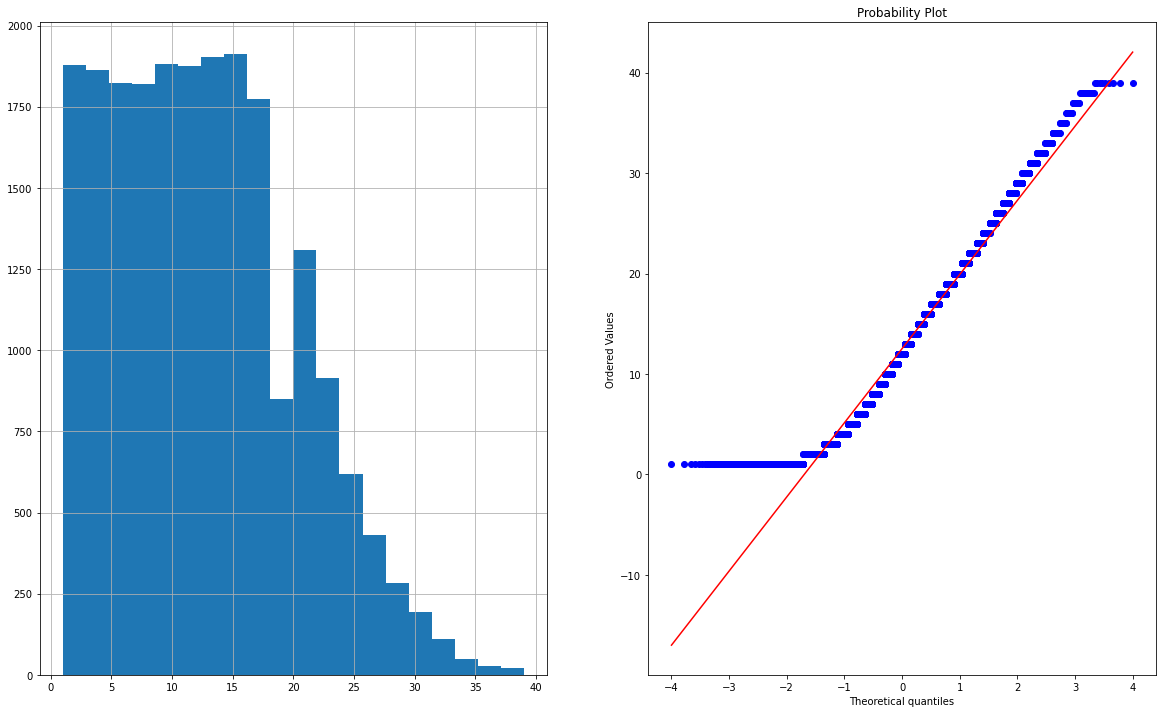

<Figure size 432x288 with 0 Axes>

In [88]:
diagnostic_plots(X_train_category, 'positionOrder')

In [89]:
## Using Yeo-Johnson Transformation for zero and negative values 

ML_YJT = YeoJohnsonTransformer(variables = ['positionOrder'])

ML_YJT.fit(X_train_category)

X_train_YJ = ML_YJT.transform(X_train_category)
X_test_YJ = ML_YJT.transform(X_test_category)

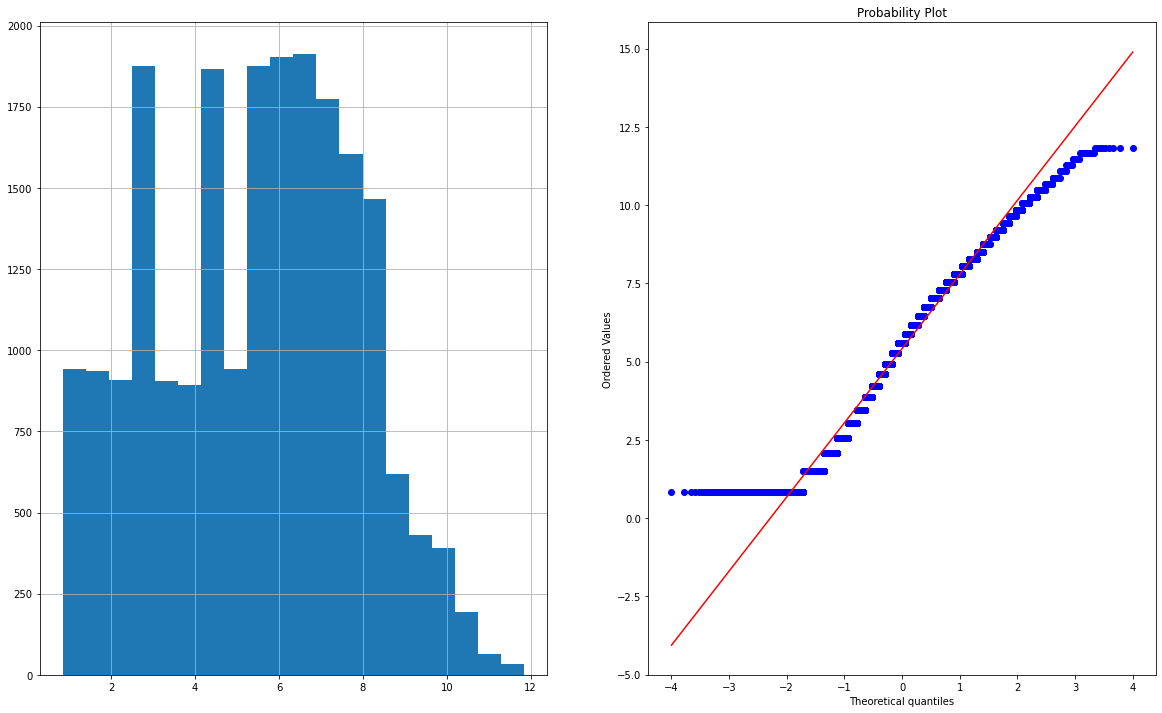

<Figure size 432x288 with 0 Axes>

In [90]:
## Creating diagnostic plot of transformed variable
diagnostic_plots(X_train_YJ, 'positionOrder')

In [91]:
## Applying Equal-Width Discretization to automate the binning of variables and respect repeated values

ML_EWD = EqualWidthDiscretiser(bins=10, variables = ['positionOrder', 'fastestLapSpeed'])

ML_EWD.fit(X_train_YJ)

train_ML = ML_EWD.transform(X_train_YJ)
test_ML = ML_EWD.transform(X_test_YJ)

Text(0, 0.5, 'Number of observations per bin')

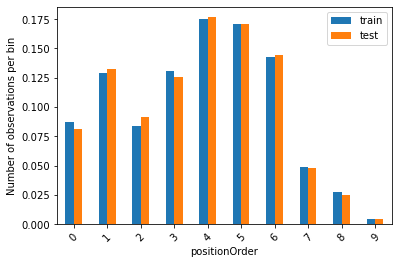

In [92]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

## positionOrder

ML_train = train_ML.groupby(['positionOrder'])['positionOrder'].count() / len(train_ML)
ML_test = test_ML.groupby(['positionOrder'])['positionOrder'].count() / len(test_ML)

PO_EWD = pd.concat([ML_train, ML_test], axis=1)
PO_EWD.columns = ['train', 'test']
PO_EWD.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Mean of Points')

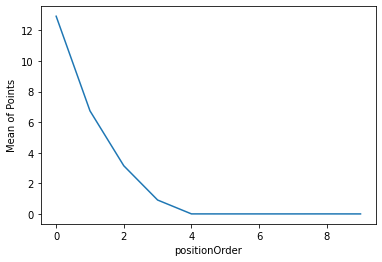

In [93]:
# explore if the bins have a linear relationship with the target
pd.concat([train_ML, y_train], axis=1).groupby('positionOrder')['points'].mean().plot()
plt.ylabel('Mean of Points')

Text(0, 0.5, 'Number of observations per bin')

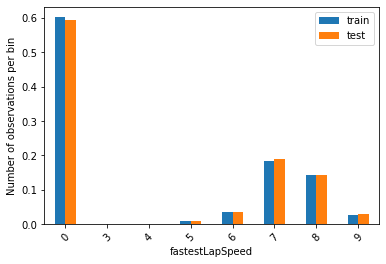

In [94]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

## fastestLapSpeed

ML_train = train_ML.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(train_ML)
ML_test = test_ML.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(test_ML)

FLS_EWD = pd.concat([ML_train, ML_test], axis=1)
FLS_EWD.columns = ['train', 'test']
FLS_EWD.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Mean of Points')

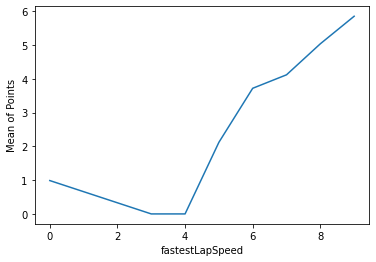

In [95]:
# explore if the bins have a linear relationship with the target
pd.concat([train_ML, y_train], axis=1).groupby('fastestLapSpeed')['points'].mean().plot()
plt.ylabel('Mean of Points')

In [96]:
# Applying standardization feature scaling - outliers in the data will not be affected

ML_scaler = StandardScaler()

ML_scaler.fit(train_ML)

X_train_scaler = ML_scaler.transform(train_ML)
X_test_scaler = ML_scaler.transform(test_ML)

In [97]:
## Now transforming the scaled data to the train/test sets

X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train_YJ.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test_YJ.columns)

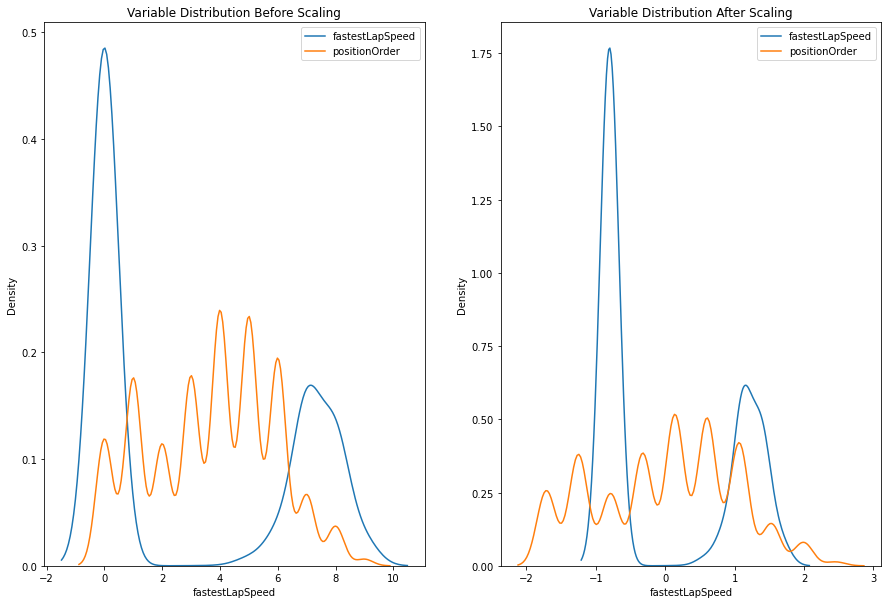

In [98]:
## Comparing the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))

ax1.set_title('Variable Distribution Before Scaling')
sns.kdeplot(train_ML['fastestLapSpeed'], ax=ax1, label ='fastestLapSpeed')
sns.kdeplot(train_ML['positionOrder'], ax=ax1, label ='positionOrder')
ax1.legend()

ax2.set_title('Variable Distribution After Scaling')
sns.kdeplot(X_train_scaler['fastestLapSpeed'], ax=ax2, label ='fastestLapSpeed')
sns.kdeplot(X_train_scaler['positionOrder'], ax=ax2, label ='positionOrder')
ax2.legend()
plt.show()

In [99]:
print(X_train_scaler.shape)
X_train_scaler.head(10)

(21541, 28)


,year,GP_name,round,driverId,driver_age,driver_nationality,constructor_name,grid,positionOrder,lap_time,...,weather_cold,weather_dry,weather_wet,weather_cloudy,driver_Fernando Alonso,driver_Lewis Hamilton,driver_Sebastian Vettel,driver_Kimi Räikkönen,driver_Felipe Massa,driver_Jenson Button
0,-0.759376,-1.316910,0.851651,-0.298274,1.856890,-1.139411,-0.937255,-0.163606,-1.250850,-0.526992,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
1,-2.154694,-1.224639,-1.092687,1.129488,2.803417,-1.000737,-0.906381,-0.864779,0.138546,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
2,1.233936,-1.132369,-0.509386,1.810472,-1.171995,-0.862064,-0.875507,-0.163606,-0.324586,-0.523692,...,-0.142718,-0.585409,-0.377834,2.750456,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
3,-0.161382,-1.040098,-0.120518,-0.693048,-0.982690,-0.723391,-0.844634,0.116863,0.601678,-0.525342,...,-0.142718,-0.585409,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
4,-0.609877,-1.132369,-0.509386,-0.314723,0.153142,-0.584718,-0.906381,-0.864779,-1.713982,-0.525342,...,-0.142718,-0.585409,2.646664,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
5,1.084438,-0.947828,-0.120518,-0.936491,1.099669,-0.446045,-0.813760,-0.864779,-0.324586,-0.522042,...,-0.142718,-0.585409,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,8.017216,-0.12454
6,-1.955363,-0.855557,-1.092687,0.859727,-0.225469,-1.139411,-0.782886,0.116863,-0.324586,-0.520392,...,7.006807,-0.585409,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
7,1.333602,-0.763287,0.462783,-0.952940,2.235501,-0.307372,-0.752012,0.257098,-0.324586,-0.525342,...,-0.142718,-0.585409,2.646664,-0.363576,-0.137902,-0.136321,-0.132018,7.803808,-0.124732,-0.12454
8,0.785441,-0.671016,2.018254,-0.975968,-0.793385,-0.723391,-0.721138,-1.285483,-1.713982,-0.518743,...,-0.142718,-0.585409,-0.377834,-0.363576,-0.137902,7.335646,-0.132018,-0.128143,-0.124732,-0.12454
9,-0.261048,-0.578746,0.851651,-0.587775,1.099669,-1.000737,-0.813760,-0.724545,0.601678,-0.525342,...,-0.142718,-0.585409,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454


In [100]:
print(X_test_scaler.shape)
X_test_scaler.head(10)

(9232, 28)


,year,GP_name,round,driverId,driver_age,driver_nationality,constructor_name,grid,positionOrder,lap_time,...,weather_cold,weather_dry,weather_wet,weather_cloudy,driver_Fernando Alonso,driver_Lewis Hamilton,driver_Sebastian Vettel,driver_Kimi Räikkönen,driver_Felipe Massa,driver_Jenson Button
0,-0.759376,1.543476,-1.092687,-0.410127,-1.739911,-1.000737,2.088379,0.537567,1.064810,-0.525342,...,-0.142718,-0.585409,2.646664,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
1,1.134270,-0.763287,0.462783,1.744677,-0.414774,1.356707,0.143329,1.238741,0.601678,-0.525342,...,-0.142718,-0.585409,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
2,0.635942,-1.224639,1.046085,-0.933201,1.288974,-0.723391,-0.443274,-0.023371,1.064810,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
3,-0.111549,1.543476,-1.481555,-0.670019,0.153142,-1.000737,2.181001,1.939914,0.601678,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
4,-1.307537,-1.040098,-0.314952,-0.028513,1.856890,-0.723391,1.872263,-1.425718,0.138546,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
5,0.835274,2.835263,1.629386,1.701910,-1.550606,0.940687,0.143329,1.238741,-0.324586,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
6,-0.958707,1.082123,0.462783,-0.242348,-0.225469,-0.446045,-0.721138,-0.444075,1.064810,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
7,0.087782,-1.316910,1.046085,-0.795031,0.153142,-0.723391,-0.906381,-0.584310,0.138546,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
8,-0.310881,-1.132369,-1.092687,-0.722656,-0.982690,-1.000737,1.193039,1.939914,-0.324586,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454
9,-0.958707,2.097099,-0.314952,-0.100888,0.531753,0.802014,2.458865,2.080148,1.064810,-0.525342,...,-0.142718,1.708207,-0.377834,-0.363576,-0.137902,-0.136321,-0.132018,-0.128143,-0.124732,-0.12454


In [103]:
## Checking for NaN values within the test set

X_test_scaler.isnull()values.any()

4524

In [106]:
## Dropping infinite/NaN values for Regression processing

X_test_scaler = X_test_scaler.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

### Naive Baseline Model

In [109]:
## Using Naive Baseline Model to provide a performance baseline for comparison

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}")

The train mean target value is 2.38


In [111]:
ML_Train_Naive = [round(mean_target_value,2) for row in X_train_scaler.iloc[:,0]]
ML_Train_Naive[0:10]

[2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38]

In [112]:
ML_Test_Naive = [round(mean_target_value,2) for row in X_test_scaler.iloc[:,0]]
ML_Test_Naive[0:10]

[2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38]

In [114]:
## Introducing Mean Squared Error - 0 is the best possible score we can get here

## Setting the train MSE score
ML_Actual_Train_MSE = y_train
ML_Predict_Train_MSE = ML_Train_Naive

MSE_Naive_Train = mean_squared_error(ML_Actual_Train_MSE, ML_Predict_Train_MSE)

## Setting the test MSE score
ML_Actual_Test_MSE = y_test
ML_Predict_Test_MSE = ML_Test_Naive

MSE_Naive_Test = mean_squared_error(ML_Actual_Test_MSE, ML_Predict_Test_MSE)

## Introducting Root Mean Squared Error

## Setting the train RMSE score
ML_Actual_Train_RMSE = y_train
ML_Predict_Train_RMSE = ML_Train_Naive

RMSE_Naive_Train = mean_squared_error(ML_Actual_Train_RMSE, ML_Predict_Train_RMSE, squared=False)

## Setting the test RMSE score
ML_Actual_Test_RMSE = y_test
ML_Predict_Test_RMSE = ML_Test_Naive

RMSE_Naive_Test = mean_squared_error(ML_Actual_Test_RMSE, ML_Predict_Test_RMSE, squared=False)

# R2 Value - 1 is best score (determining how X columns account for y's variances)

## Setting the train R2 score
ML_Actual_Train_R2 = y_train
ML_Predict_Train_R2 = ML_Train_Naive

R2_Naive_Train = r2_score(ML_Actual_Train_R2, ML_Predict_Train_R2)

## Setting the test R2 score
ML_Actual_Test_R2 = y_test
ML_Predict_Test_R2 = ML_Test_Naive

R2_Naive_Test = r2_score(ML_Actual_Test_R2, ML_Predict_Test_R2)

print(f"The Naive Baseline Model's Mean Squared Error on the training data is: {MSE_Naive_Train:.2f}")
print(f"The Naive Baseline Model's Mean Squared Error on the test data is: {MSE_Naive_Test:.2f}")
print()
print(f"The Naive Baseline Model's Root Mean Squared Error on the training data is: {RMSE_Naive_Train:.2f}")
print(f"The Naive Baseline Model's Root Mean Squared Error on the test data is: {RMSE_Naive_Test:.2f}")
print()
print(f"The Naive Baseline Model's R2 Value on the training data is: {R2_Naive_Train:.2f}")
print(f"The Naive Baseline Model's R2 Value on the test data is: {R2_Naive_Test:.2f}.")

The Naive Baseline Model's Mean Squared Error on the training data is: 24.29
The Naive Baseline Model's Mean Squared Error on the test data is: 23.24

The Naive Baseline Model's Root Mean Squared Error on the training data is: 4.93
The Naive Baseline Model's Root Mean Squared Error on the test data is: 4.82

The Naive Baseline Model's R2 Value on the training data is: -0.00
The Naive Baseline Model's R2 Value on the test data is: -0.00.


### Linear Regression

In [115]:
## Linear Regression 

ML_Linear_Reg = LinearRegression().fit(X_train_scaler, y_train)

ML_Train_Linear_Reg = ML_Linear_Reg.predict(X_train_scaler)
ML_Test_Linear_Reg = ML_Linear_Reg.predict(X_test_scaler)

In [116]:
## Introducing Mean Squared Error - 0 is the best possible score we can get here

## Setting the train MSE score
ML_Actual_Train_MSE = y_train
ML_Predict_Train_MSE = ML_Train_Linear_Reg

MSE_Linear_Reg_Train = mean_squared_error(ML_Actual_Train_MSE, ML_Predict_Train_MSE)

## Setting the test MSE score
ML_Actual_Test_MSE = y_test
ML_Predict_Test_MSE = ML_Test_Linear_Reg

MSE_Linear_Reg_Test = mean_squared_error(ML_Actual_Test_MSE, ML_Predict_Test_MSE)

## Introducting Root Mean Squared Error

## Setting the train RMSE score
ML_Actual_Train_RMSE = y_train
ML_Predict_Train_RMSE = ML_Train_Linear_Reg

RMSE_Linear_Reg_Train = mean_squared_error(ML_Actual_Train_RMSE, ML_Predict_Train_RMSE, squared=False)

## Setting the test RMSE score
ML_Actual_Test_RMSE = y_test
ML_Predict_Test_RMSE = ML_Test_Linear_Reg

RMSE_Linear_Reg_Test = mean_squared_error(ML_Actual_Test_RMSE, ML_Predict_Test_RMSE, squared=False)

# R2 Value - 1 is best score (determining how X columns account for y's variances)

## Setting the train R2 score
ML_Actual_Train_R2 = y_train
ML_Predict_Train_R2 = ML_Train_Linear_Reg

R2_Linear_Reg_Train = r2_score(ML_Actual_Train_R2, ML_Predict_Train_R2)

## Setting the test R2 score
ML_Actual_Test_R2 = y_test
ML_Predict_Test_R2 = ML_Test_Linear_Reg

R2_Linear_Reg_Test = r2_score(ML_Actual_Test_R2, ML_Predict_Test_R2)

print(f"The Linear Regression Model's Mean Squared Error on the training data is: {MSE_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's Mean Squared Error on the test data is: {MSE_Linear_Reg_Test:.2f}")
print()
print(f"The Linear Regression Model's Root Mean Squared Error on the training data is: {RMSE_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's Root Mean Squared Error on the test data is: {RMSE_Linear_Reg_Test:.2f}")
print()
print(f"The Linear Regression Model's R2 Value on the training data is: {R2_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's R2 Value on the test data is: {R2_Linear_Reg_Test:.2f}.")

The Linear Regression Model's Mean Squared Error on the training data is: 8.21
The Linear Regression Model's Mean Squared Error on the test data is: 8.00

The Linear Regression Model's Root Mean Squared Error on the training data is: 2.87
The Linear Regression Model's Root Mean Squared Error on the test data is: 2.83

The Linear Regression Model's R2 Value on the training data is: 0.66
The Linear Regression Model's R2 Value on the test data is: 0.66.
